In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

Keys in the file: ['archive', 'artiq_version', 'datasets', 'expid', 'rid', 'run_time', 'start_time']
<KeysViewHDF5 ['__param__qubit', 'beta_index', 'cal_count', 'cal_fit_signal', 'cal_freq', 'cal_pos', 'pmt_counts_avg_thresholded', 'pos']>
<KeysViewHDF5 ['__param__qubit_tracker']>
b'{"devarg_override": {}, "log_level": 30, "file": "VdP_Two_Ion/A7_final_Cat_2D_AWG copy.py", "class_name": "A7_Cat_Wigner_2D_AWG", "arguments": {"DopplerCool_frequency_397_cooling": 210254545.45454544, "DopplerCool_frequency_866_cooling": 79090909.0909091, "DopplerCool_frequency_397_far_detuned": 220000000.0, "DopplerCool_attenuation_866": 13.0, "DopplerCool_attenuation_397_far_detuned": 18.0, "DopplerCool_doppler_cooling_cooling_time": 0.003, "DopplerCool_attenuation_397": 22.0, "SideBandCool2Mode_sideband2mode_att_729_dp": 18.0, "SideBandCool2Mode_sideband2mode_freq_729_sp": 80000000.0, "SideBandCool2Mode_sideband2mode_att_729_sp": 13.0, "SideBandCool2Mode_sideband2mode_vib_freq1": 527300.0, "SideBandCool2

Text(0, 0.5, '<z>')

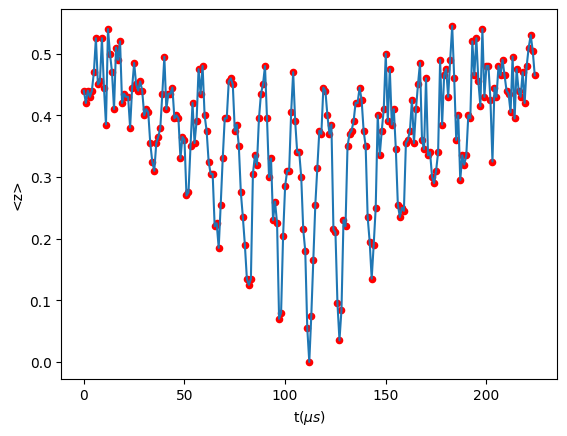

In [2]:
# Path to your .h5 file
file_path = '../results/2025-02-14/10/000055472-A7_Cat_Wigner_2D_AWG.h5'
#000044695-A6_VdP1mode_Wigner_AWG_Cam.h5'
#000043982-A6_Displacement_Wigner_AWG_Cam.h5'
#27408-A2_Displace_Wigner_2D.h5'
#4_Vdp_Wigner_2D.h5'
#-A2_Displace_Wigner_2D.h5'
#-A4_Vdp_Wigner_2D.h5'

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Print the names of the groups/datasets in the file
    print("Keys in the file:", list(file.keys()))
    
    # Assuming there's a dataset named 'data' in the file
    # Modify this part according to your file's structure
    data = file['datasets']
    print(file['datasets'].keys())

    print(file['archive'].keys())
    #print(file['archive']['__param__SDF'].keys())

    print(file['expid'][()])


    rabi_t= data['beta_index'][:]
    pmt_count=data['pmt_counts_avg_thresholded'][:]

plt.figure()
plt.plot(rabi_t, pmt_count)
plt.scatter(rabi_t, pmt_count,c='red',s=20)
plt.xlabel('${\\rm t}(\mu s)$')
plt.ylabel('<z>')





In [3]:
pmt_count=pmt_count.reshape(int(np.sqrt(len(pmt_count))),int(np.sqrt(len(pmt_count))))
#pmt_count[pmt_count<0.0001]=np.nan
# pmt_count[pmt_count>0.595]=np.nan

In [4]:
eta1=0.0944#0.0944
eta2=0.0944#0.0717
Rabi_readout1=0.1*2*np.pi
Rabi_readout2=0.1*2*np.pi
beta_time_range_us1 = 40
beta_time_range_us2 = 40

beta_range1=eta1*Rabi_readout1*beta_time_range_us1
beta_range2=eta2*Rabi_readout2*beta_time_range_us2

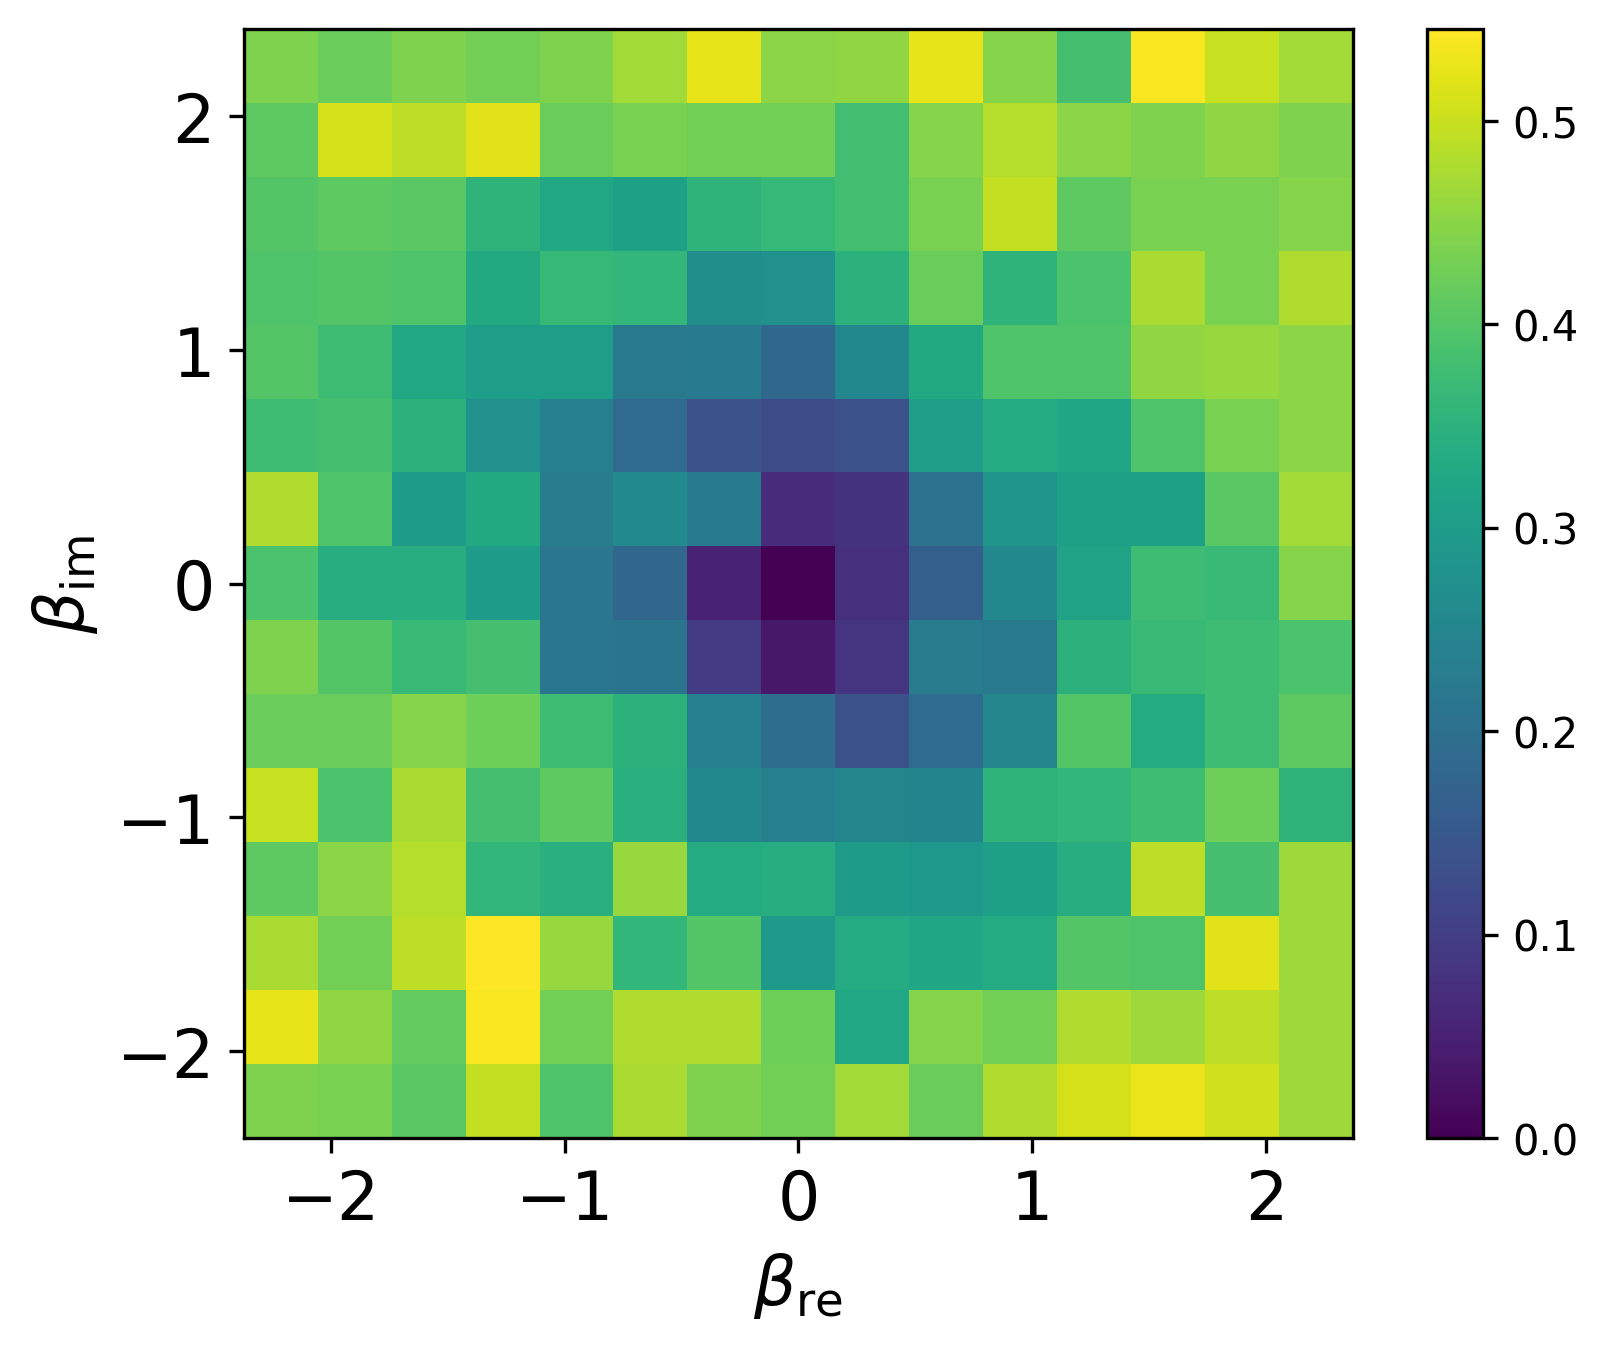

In [5]:
import matplotlib.colors as mcolors
cmap = plt.cm.viridis  # You can choose any colormap
cmap = cmap.copy()     # Copy the colormap to modify it
cmap.set_bad(color='gray')  # Set NaN values to gray

# pmt_count[pmt_count>0.7]=np.nan

plt.figure(dpi=300)

plt.imshow(pmt_count, cmap=cmap, extent=[-beta_range1,beta_range1,-beta_range2,beta_range2], aspect=beta_range1/beta_range2)
plt.xlabel('$\\beta_{\\rm re}$',fontsize=16)
plt.ylabel('$\\beta_{\\rm im}$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()

(0.45, 0.6)

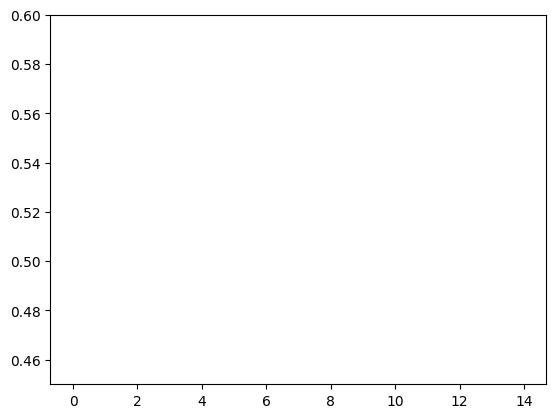

In [6]:
plt.plot(pmt_count[len(pmt_count)//2])
plt.ylim(0.45,0.6)

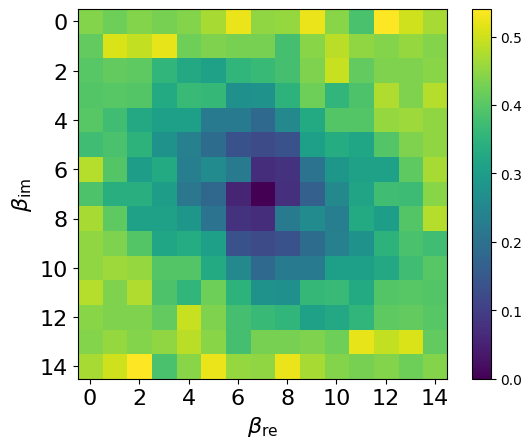

In [7]:
pmt_count_tmp=pmt_count.copy()
pmt_count_tmp[len(pmt_count)//2+1:]=pmt_count_tmp[:len(pmt_count)//2][::-1,::-1]

plt.imshow(pmt_count_tmp, cmap=cmap)#, extent=[-beta_range1,beta_range1,-beta_range2,beta_range2])
plt.xlabel('$\\beta_{\\rm re}$',fontsize=16)
plt.ylabel('$\\beta_{\\rm im}$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()

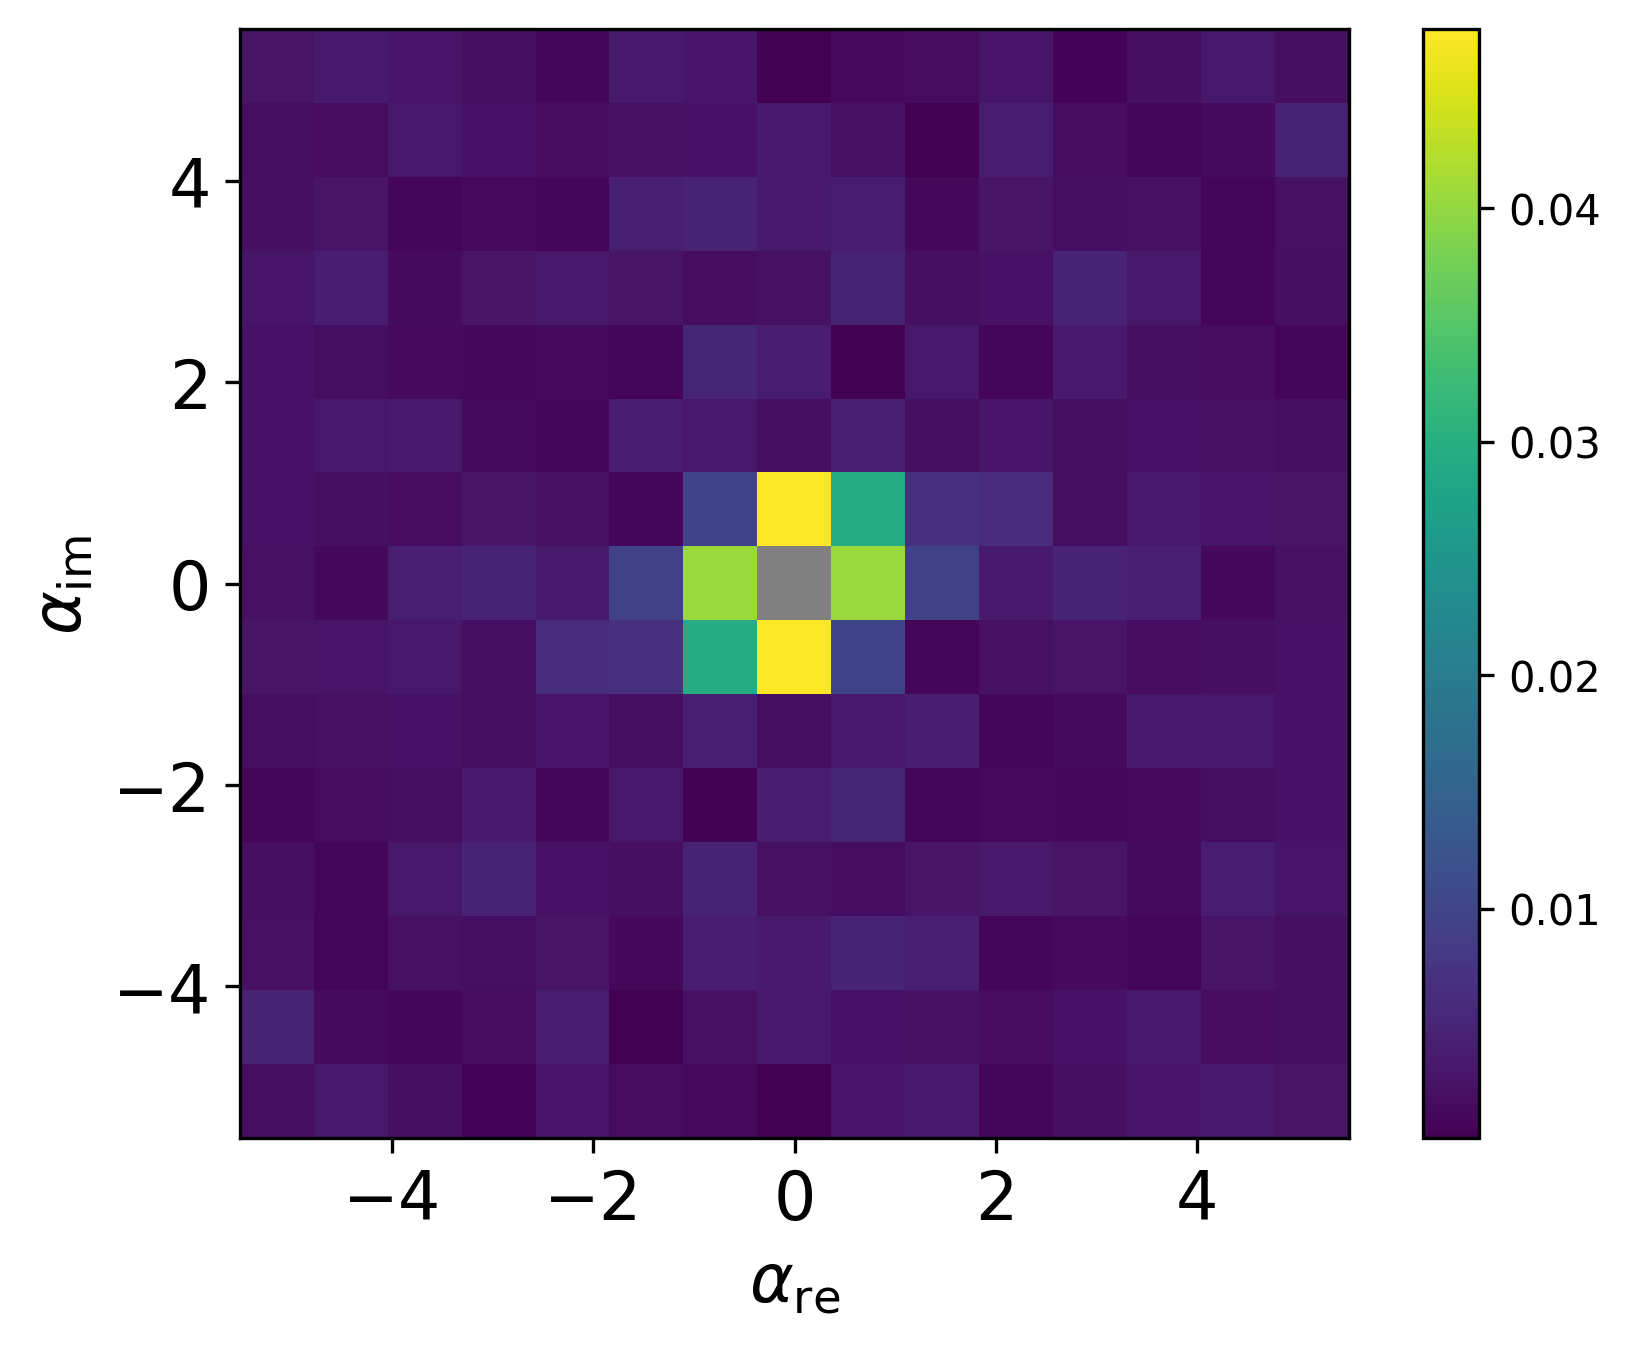

In [8]:
pmt_count_tmp=pmt_count.copy()

pmt_count_tmp=np.nan_to_num(pmt_count_tmp, nan=0)
fft_tmp=np.fft.ifft2(pmt_count_tmp)

fft_tmp[0,0]=np.nan
# fft_tmp[np.abs(fft_tmp)>0.03]=np.nan

fft_tmp=np.fft.fftshift(fft_tmp)

beta=np.linspace(-beta_range1, beta_range1, len(pmt_count))
alpha=np.fft.fftshift(np.fft.fftfreq(len(beta), beta[1]-beta[0]))*4
# fft_freq=np.fft.fftfreq(len())

#ft_tmp[np.abs(fft_tmp)>0.017]=np.nan

plt.figure(dpi=300)
plt.imshow(np.abs(fft_tmp), cmap=cmap,extent=[alpha[0], alpha[-1], alpha[0], alpha[-1]])

plt.xlabel('$\\alpha_{\\rm re}$',fontsize=16)
plt.ylabel('$\\alpha_{\\rm im}$',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()


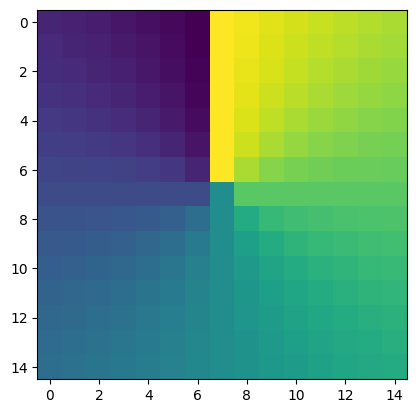

In [9]:

phase=np.loadtxt ('../repository/Vdp/beta_phase.txt')
plt.imshow(phase.reshape(15,15))
